# 2018 Crimes in Boston 
### by Omoshirokunai

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crime-incident-reports-2018.csv")
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98888 entries, 0 to 98887
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      98888 non-null  object 
 1   OFFENSE_CODE         98888 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null  object 
 3   OFFENSE_DESCRIPTION  98888 non-null  object 
 4   DISTRICT             98206 non-null  object 
 5   REPORTING_AREA       98888 non-null  object 
 6   SHOOTING             402 non-null    object 
 7   OCCURRED_ON_DATE     98888 non-null  object 
 8   YEAR                 98888 non-null  int64  
 9   MONTH                98888 non-null  int64  
 10  DAY_OF_WEEK          98888 non-null  object 
 11  HOUR                 98888 non-null  int64  
 12  UCR_PART             98868 non-null  object 
 13  STREET               97274 non-null  object 
 14  Lat                  92459 non-null  float64
 15  Long                 92459 non-null 

In [4]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


note that some long and lat values are incorrect like 0.00, -1.00

In [5]:
wrongval = [0.,-1.,1.]

p = df[["OCCURRED_ON_DATE","MONTH","DAY_OF_WEEK",
        "HOUR","STREET","Lat", "Long", "OFFENSE_CODE_GROUP","STREET"]].copy()

p = p[p.Long.isin(wrongval) == False]
p = p[p["Long"].notna()]


p["MONTHN"]=p["MONTH"].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan", "Feb", "Mar", "Apr", "May",
                                                            "June","July", "Aug","Sept","Oct","Nov", "Dec"])
p["DAYN"] = p["DAY_OF_WEEK"].replace(['Monday', 'Tuesday', 'Wednesday', 'Sunday', 'Thursday', 'Friday','Saturday'],
                            [1,2,3,7,4,5,6])

# p = p.groupby(["OCCURRED_ON_DATE"], as_index=False)
p.head(10)

,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,OFFENSE_CODE_GROUP,STREET,MONTHN,DAYN
0,2018-04-30 09:00:00,4,Monday,9,HAZLETON ST,42.279971,-71.095534,Investigate Person,HAZLETON ST,Apr,1
1,2018-03-06 08:00:00,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,Larceny,HYDE PARK AVE,Mar,2
2,2018-10-31 12:00:00,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,Harassment,PRIMROSE ST,Oct,3
3,2018-04-09 08:43:00,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,Harassment,ATLANTIC AVE,Apr,1
4,2018-01-01 00:00:00,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,Property Lost,COMMONWEALTH AVE,Jan,1
5,2018-10-01 09:15:00,10,Monday,9,CEDRUS AVE,42.278398,-71.135279,Harassment,CEDRUS AVE,Oct,1
6,2018-11-18 09:00:00,11,Sunday,9,BLUE HILL AVE,42.303161,-71.085156,Fraud,BLUE HILL AVE,Nov,7
7,2018-01-01 00:00:00,1,Monday,0,HARRISON AVE,42.331538,-71.080157,Harassment,HARRISON AVE,Jan,1
8,2018-10-15 00:00:00,10,Monday,0,WASHINGTON ST,42.336750,-71.076628,Larceny,WASHINGTON ST,Oct,1
9,2018-05-03 00:00:00,5,Thursday,0,EVERETT AVE,42.315267,-71.063069,Larceny,EVERETT AVE,May,4


<AxesSubplot:xlabel='Long', ylabel='Lat'>

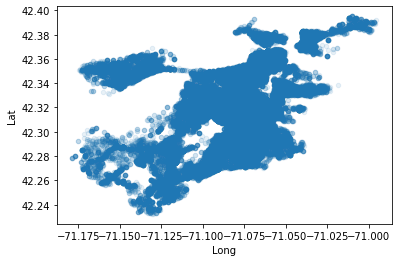

In [6]:
p.plot(kind="scatter", x = "Long", y = "Lat", alpha=0.1)

In [7]:
# p.plot(kind="scatter", x = "Long", y = "Lat", alpha=0.4,
#              s=p["DAYN"], label = "DAY", figsize=(13,8),
#              c="HOUR", cmap=plt.get_cmap("jet"), colorbar=True)
# plt.legend

In [8]:
l = p.groupby(["MONTHN","DAY_OF_WEEK","OFFENSE_CODE_GROUP"]).size().unstack(fill_value=0)
l.head(20)
# l.pivot(index="MONTH").head(10)
# l.reset_index()

OFFENSE_CODE_GROUP  Aggravated Assault  Aircraft  Arson  \
MONTHN DAY_OF_WEEK                                        
Apr    Friday                       34         0      1   
       Monday                       26         0      0   
       Saturday                     30         0      0   
       Sunday                       32         0      0   
       Thursday                     22         0      0   
       Tuesday                      23         0      1   
       Wednesday                    22         0      0   
Aug    Friday                       37         0      0   
       Monday                       18         0      0   
       Saturday                     30         0      0   
       Sunday                       28         0      0   
       Thursday                     21         0      0   
       Tuesday                      23         0      0   
       Wednesday                    27         0      0   
Dec    Friday                       23         0      0   
       Monday                       31         0      0   
       Saturday                     37         0      0   
       Sunday                       22         0      0   
       Thursday                     14         1      1   
       Tuesday                      17         0      1   

OFFENSE_CODE_GROUP  Assembly or Gathering Violations  Auto Theft  \
MONTHN DAY_OF_WEEK                                                 
Apr    Friday                                      2          10   
       Monday                                      0          15   
       Saturday                                    9          16   
       Sunday                                      4          15   
       Thursday                                    3          18   
       Tuesday                                     2          11   
       Wednesday                                   2           3   
Aug    Friday                                      1          20   
       Monday                                      0          10   
       Saturday                                    1          18   
       Sunday                                      0          18   
       Thursday                                    1          25   
       Tuesday                                     0          13   
       Wednesday                                   2          15   
Dec    Friday                                      0           7   
       Monday                                      0          13   
       Saturday                                    5          16   
       Sunday                                      2          13   
       Thursday                                    0           7   
       Tuesday                                     0           8   

OFFENSE_CODE_GROUP  Auto Theft Recovery  Ballistics  Bomb Hoax  \
MONTHN DAY_OF_WEEK                                               
Apr    Friday                         2           1          1   
       Monday                         5           2          0   
       Saturday                       2           2          0   
       Sunday                         3           4          0   
       Thursday                       5           0          0   
       Tuesday                        5           2          0   
       Wednesday                      9           1          0   
Aug    Friday                         7           6          1   
       Monday                         4           0          0   
       Saturday                       1           3          0   
       Sunday                         4           3          0   
       Thursday                       7           1          0   
       Tuesday                        5           3          1   
       Wednesday                      4           3          0   
Dec    Friday                         2           6          1   
       Monday                         1           3          1   
       Saturday 

<AxesSubplot:title={'center':'crimes that occured on Monday-Friday-2018'}, xlabel='OFFENSE_CODE_GROUP'>

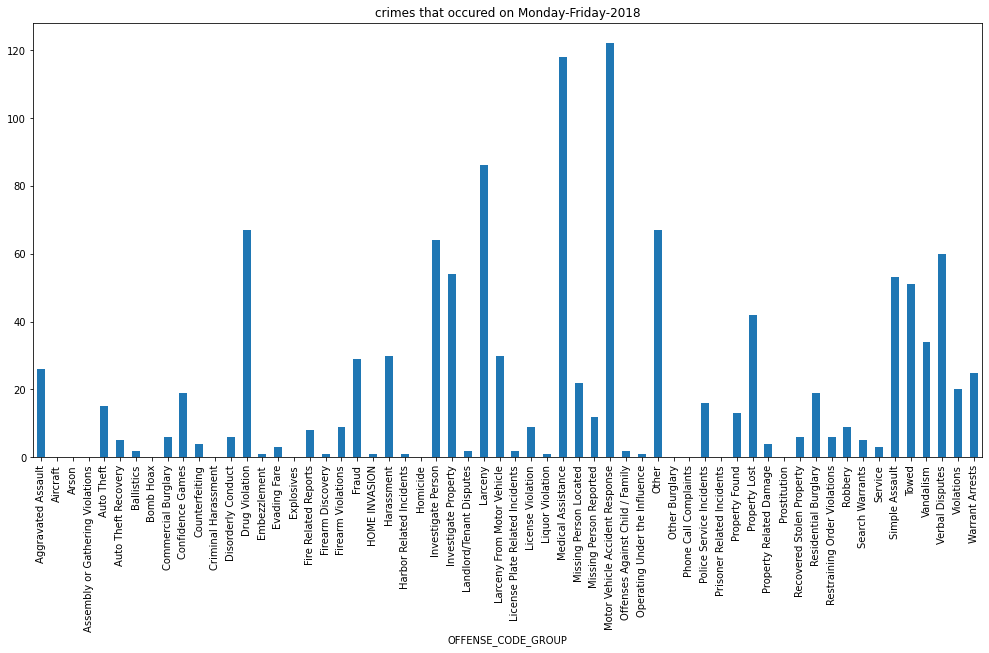

In [9]:
l.iloc[1].plot(kind="bar", figsize=(17,8), title=f"crimes that occured on {l.iloc[1].name[1]}-{l.iloc[0].name[1]}-2018")

In [10]:
c = p.groupby(["MONTH","OFFENSE_CODE_GROUP"])["OFFENSE_CODE_GROUP"].size().unstack(fill_value=0)
c

OFFENSE_CODE_GROUP,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Bomb Hoax,Commercial Burglary,Confidence Games,...,Restraining Order Violations,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
MONTH,,,,,,,,,,,,,,,,,,,,,
1,165,1,3,14,90,39,15,1,26,50,...,43,104,22,2,426,191,345,367,98,179
2,174,0,0,21,63,17,12,1,19,64,...,36,99,16,5,326,226,269,308,135,141
3,171,1,1,15,71,23,16,1,20,70,...,33,80,22,3,346,316,311,351,131,172
4,189,0,2,22,88,31,12,1,27,79,...,30,79,27,9,415,303,274,342,135,172
5,223,2,0,11,110,25,26,1,40,71,...,33,93,14,9,536,332,375,397,121,204
6,237,0,4,18,145,30,34,1,37,73,...,30,101,28,13,482,356,399,385,119,196
7,220,1,1,23,141,25,30,1,28,63,...,44,88,11,7,452,291,334,401,136,169
8,184,0,0,5,119,32,19,2,25,71,...,55,85,21,3,394,372,391,409,109,195
9,184,0,2,22,138,29,24,1,19,78,...,46,100,13,5,413,326,362,396,101,172


In [11]:
c["TOTAL"]= c.sum(axis=1)
c

OFFENSE_CODE_GROUP,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Bomb Hoax,Commercial Burglary,Confidence Games,...,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,TOTAL
MONTH,,,,,,,,,,,,,,,,,,,,,
1,165,1,3,14,90,39,15,1,26,50,...,104,22,2,426,191,345,367,98,179,7352
2,174,0,0,21,63,17,12,1,19,64,...,99,16,5,326,226,269,308,135,141,6510
3,171,1,1,15,71,23,16,1,20,70,...,80,22,3,346,316,311,351,131,172,7308
4,189,0,2,22,88,31,12,1,27,79,...,79,27,9,415,303,274,342,135,172,7518
5,223,2,0,11,110,25,26,1,40,71,...,93,14,9,536,332,375,397,121,204,8400
6,237,0,4,18,145,30,34,1,37,73,...,101,28,13,482,356,399,385,119,196,8379
7,220,1,1,23,141,25,30,1,28,63,...,88,11,7,452,291,334,401,136,169,8167
8,184,0,0,5,119,32,19,2,25,71,...,85,21,3,394,372,391,409,109,195,8241
9,184,0,2,22,138,29,24,1,19,78,...,100,13,5,413,326,362,396,101,172,7909


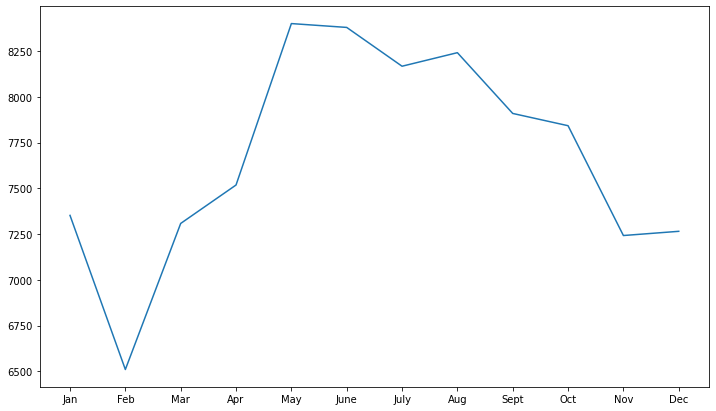

In [12]:
plt.figure(figsize=(12,7))
plt.plot(c.index, c["TOTAL"])
plt.locator_params(axis="x", nbins=13)


#specify x-axis labels
x_labels = ['Jan', 'Feb','Mar','Apr', 'May', 'June', 'July','Aug','Sept','Oct','Nov','Dec'] 

#add x-axis values to plot
plt.xticks(ticks=c.index, labels=x_labels)

plt.show()

In [13]:
crimespmonth= p.pivot_table(index="MONTH", columns="DAY_OF_WEEK", values="OFFENSE_CODE_GROUP", aggfunc=["count"])

# crimespmonth.reset_index()
crimespmonth = crimespmonth.droplevel(level=0, axis=1)
crimespmonth

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
MONTH,,,,,,,
1,1017,1243,955,838,900,1206,1193
2,959,956,921,761,994,955,964
3,1287,931,1134,843,1168,983,962
4,1054,1191,1056,1078,1058,1016,1065
5,1184,1020,1044,936,1411,1389,1416
6,1466,1169,1342,937,1181,1122,1162
7,1074,1337,1036,1208,1091,1340,1081
8,1458,1071,996,907,1398,1063,1348
9,1095,1072,1333,1199,1083,1004,1123


<AxesSubplot:title={'center':'Boston Crimes per day'}>

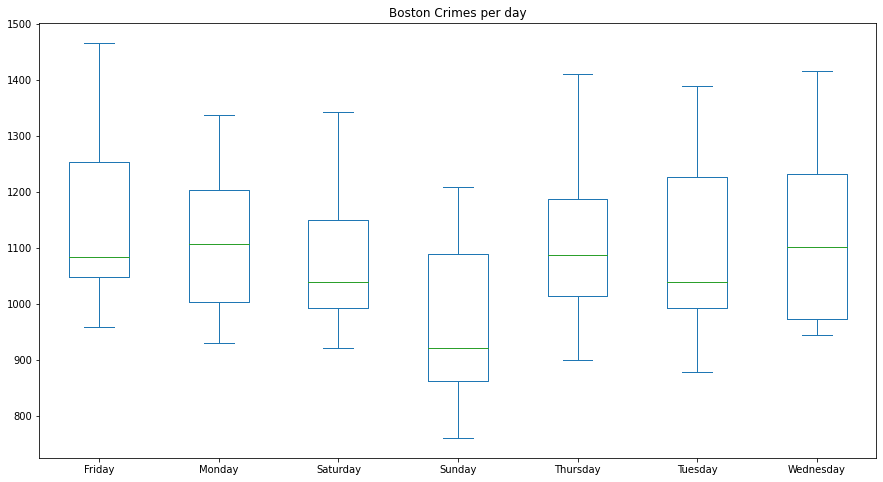

In [14]:
crimespmonth.plot(kind="box", figsize=(15,8), y=crimespmonth.columns, title="Boston Crimes per day")